# Deep Learning [CNN] :-
## Cat vs Dog (🐱🆚🐶)

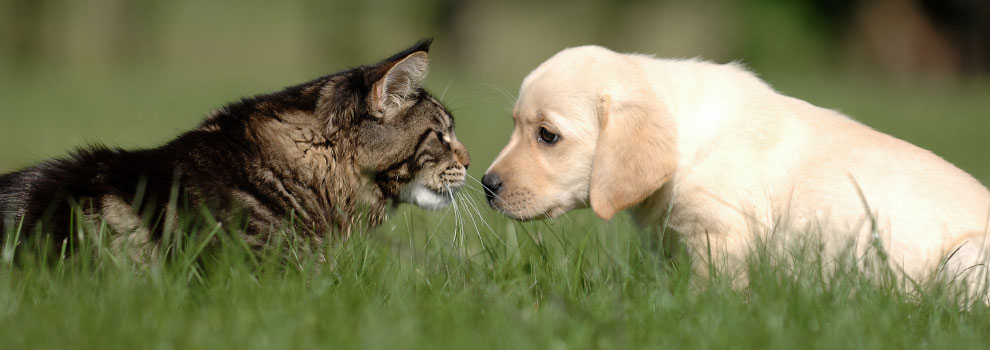

In [3]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Cat vs Dog.jpg")

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Data Import :

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 159MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


# File Unzipping : 

In [3]:
import zipfile
file=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
file.extractall('/content')
file.close()


In [4]:
import numpy as np
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from keras import Sequential

In [5]:
import cv2
import matplotlib.pyplot as plt

## Class - A :

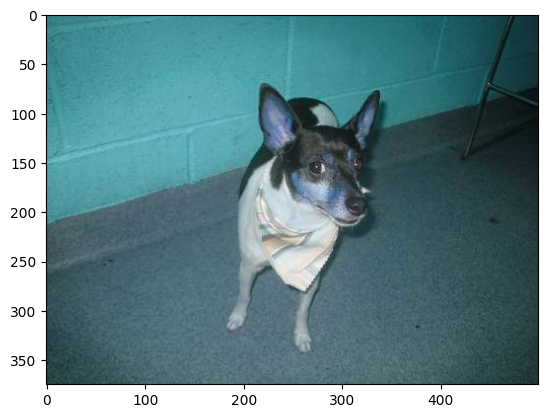

In [6]:
image_dog=cv2.imread('/content/train/dogs/dog.10002.jpg')
plt.imshow(image_dog)

In [7]:
image_dog.shape

(375, 499, 3)

In [9]:
image_dog.size,image_dog.shape,image_dog.ndim

(561375, (375, 499, 3), 3)

## Class - B :

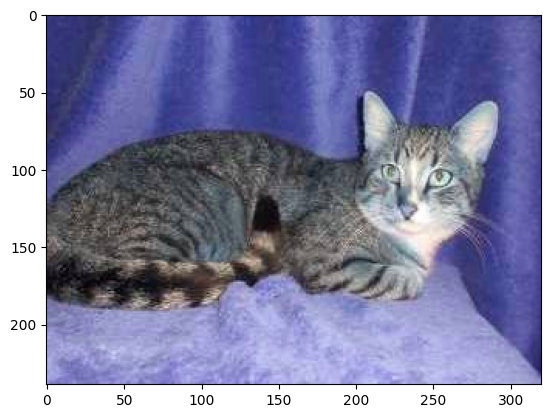

In [10]:
image_cat=cv2.imread('/content/train/cats/cat.10004.jpg')
plt.imshow(image_cat)

In [11]:
image_cat.size,image_cat.shape,image_cat.ndim

(229440, (239, 320, 3), 3)

# Traning & Testing :

In [12]:
train_data=keras.utils.image_dataset_from_directory(directory='/content/train',
                                                    image_size=(256,256))
test_data=keras.utils.image_dataset_from_directory(directory='/content/test',
                                                   image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# Grid Normalization :

In [13]:
def normalization(image, label):
    f_image=tensorflow.cast(image/255,tensorflow.float64)
    return f_image, label

train_data = train_data.map(normalization)
test_data = test_data.map(normalization)

# Model :

In [19]:
model=Sequential()
model.add(Conv2D(40,kernel_size=(3,3),padding='valid',input_shape=(256,256,3),activation='relu'))
model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(80,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(160,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(Conv2D(160,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(320,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(640,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

# Model Checkpoint :

In [16]:
from keras.callbacks import ModelCheckpoint

In [17]:
pwd

'/content'

In [21]:
path='/content/checkpoints_01-{epoch:02d}-{val_accuracy:.2f}.h5'
checkpoint=ModelCheckpoint(filepath=path,save_best_only=True,monitor='val_accuracy',mode='max',verbose=1)

In [22]:
H2=model.fit(train_data,validation_data=test_data,epochs=20,callbacks=[checkpoint],batch_size=10)

Epoch 1/20
625/625 [==============================] - ETA: 0s - loss: 0.8663 - accuracy: 0.5403
Epoch 1: val_accuracy improved from -inf to 0.55320, saving model to /content/checkpoints_01-01-0.55.h5
625/625 [==============================] - 184s 260ms/step - loss: 0.8663 - accuracy: 0.5403 - val_loss: 0.6825 - val_accuracy: 0.5532
Epoch 2/20
625/625 [==============================] - ETA: 0s - loss: 0.6097 - accuracy: 0.6658
Epoch 2: val_accuracy improved from 0.55320 to 0.66740, saving model to /content/checkpoints_01-02-0.67.h5
625/625 [==============================] - 168s 269ms/step - loss: 0.6097 - accuracy: 0.6658 - val_loss: 0.6007 - val_accuracy: 0.6674
Epoch 3/20
625/625 [==============================] - ETA: 0s - loss: 0.5022 - accuracy: 0.7621
Epoch 3: val_accuracy improved from 0.66740 to 0.77820, saving model to /content/checkpoints_01-03-0.78.h5
625/625 [==============================] - 168s 268ms/step - loss: 0.5022 - accuracy: 0.7621 - val_loss: 0.4629 - val_accura

## Traning & Testing Loss :

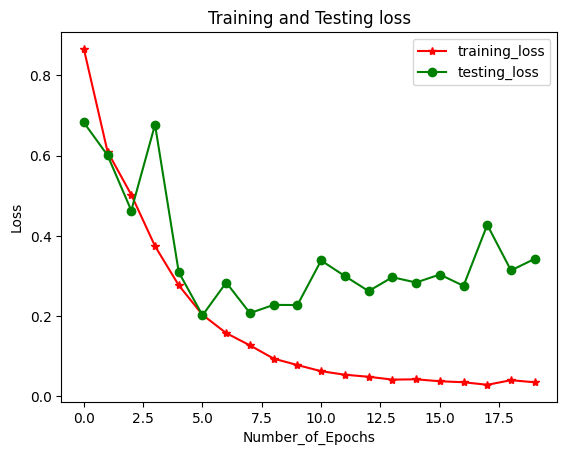

In [23]:
plt.plot(H2.epoch,H2.history['loss'],color='red',marker='*',label='training_loss')
plt.plot(H2.epoch,H2.history['val_loss'],color='green',marker='o',label='testing_loss')
plt.xlabel('Number_of_Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()

## Traning & Testing Accuracy :

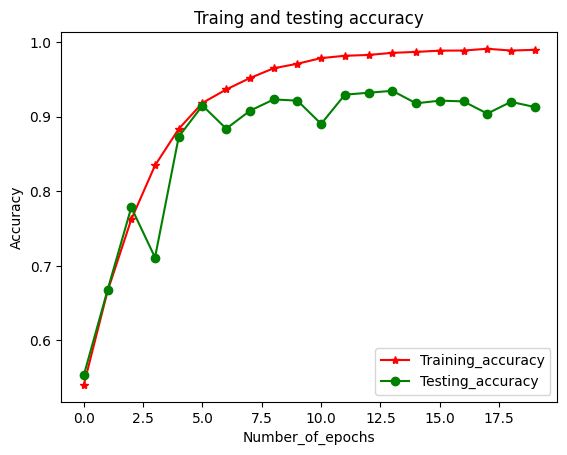

In [24]:
plt.plot(H2.epoch,H2.history['accuracy'],color='red',marker='*',label='Training_accuracy')
plt.plot(H2.epoch,H2.history['val_accuracy'],color='green',marker='o',label='Testing_accuracy')
plt.xlabel('Number_of_epochs')
plt.ylabel('Accuracy')
plt.title('Traing and testing accuracy')
plt.legend()
plt.show()

## Downloaded Images :

In [25]:
img1=cv2.imread('/content/download (1).jpeg')
img2=cv2.imread('/content/download.jpeg')
img3=cv2.imread('/content/images (1).jpeg')
img4=cv2.imread('/content/images.jpeg')

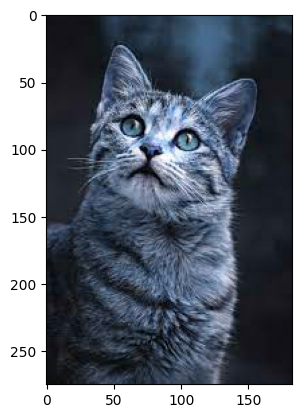

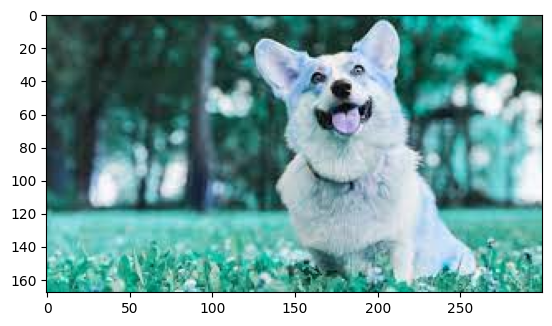

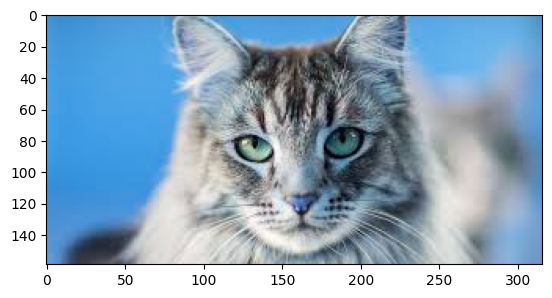

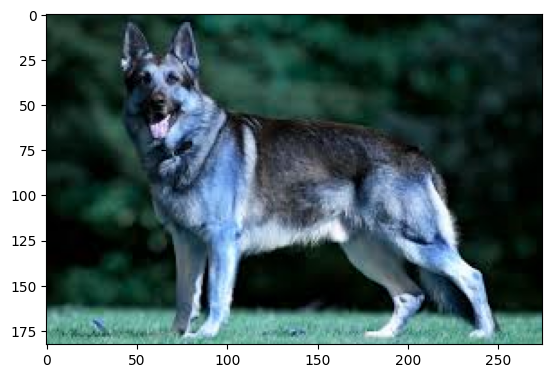

In [28]:
%matplotlib inline
ils=[img1,img2,img3,img4]
for i in ils:
  plt.imshow(i)
  plt.show()

In [29]:
img1.shape,img2.shape,img3.shape,img4.shape

((275, 183, 3), (168, 300, 3), (159, 316, 3), (183, 275, 3))

In [30]:
test_img1=cv2.resize(img1,(256,256))
test_img1.reshape(1,256,256,3)
test_img2=cv2.resize(img2,(256,256))
test_img2.reshape(1,256,256,3)
test_img3=cv2.resize(img3,(256,256))
test_img3.reshape(1,256,256,3)
test_img4=cv2.resize(img4,(256,256))
test_img4.reshape(1,256,256,3)


array([[[[ 25,  51,  38],
         [ 25,  51,  38],
         [ 25,  51,  38],
         ...,
         [ 11,  24,  22],
         [ 11,  24,  22],
         [ 11,  24,  22]],

        [[ 27,  53,  40],
         [ 27,  53,  40],
         [ 26,  53,  40],
         ...,
         [  9,  23,  21],
         [ 10,  23,  21],
         [ 10,  23,  21]],

        [[ 30,  56,  43],
         [ 29,  55,  42],
         [ 29,  55,  42],
         ...,
         [  7,  21,  20],
         [  8,  21,  19],
         [  8,  21,  19]],

        ...,

        [[ 90, 155, 134],
         [ 90, 155, 134],
         [104, 169, 148],
         ...,
         [ 91, 157, 133],
         [ 97, 160, 136],
         [108, 170, 146]],

        [[ 94, 160, 139],
         [ 83, 149, 128],
         [105, 171, 150],
         ...,
         [ 99, 165, 140],
         [105, 167, 143],
         [112, 174, 150]],

        [[101, 168, 147],
         [ 78, 146, 125],
         [104, 171, 150],
         ...,
         [107, 173, 148],
        

In [32]:
test_img1.shape,test_img2.shape,test_img3.shape,test_img4.shape

((256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3))

# Model Summary :

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 40)      1120      
                                                                 
 conv2d_8 (Conv2D)           (None, 252, 252, 40)      14440     
                                                                 
 batch_normalization_5 (Batc  (None, 252, 252, 40)     160       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 126, 126, 40)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 80)      28880     
                                                                 
 batch_normalization_6 (Batc  (None, 124, 124, 80)    

In [34]:
model.evaluate(test_data)

157/157 [==============================] - 14s 88ms/step - loss: 0.3423 - accuracy: 0.9128


[0.34233221411705017, 0.9128000140190125]

In [35]:
from keras.models import load_model

In [36]:
model1=load_model('/content/checkpoints_01-14-0.93.h5')

# Model1 Summary :

In [37]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 40)      1120      
                                                                 
 conv2d_8 (Conv2D)           (None, 252, 252, 40)      14440     
                                                                 
 batch_normalization_5 (Batc  (None, 252, 252, 40)     160       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 126, 126, 40)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 80)      28880     
                                                                 
 batch_normalization_6 (Batc  (None, 124, 124, 80)    

## Predictions :

In [4]:
# 0 = dog
# 1 = cat

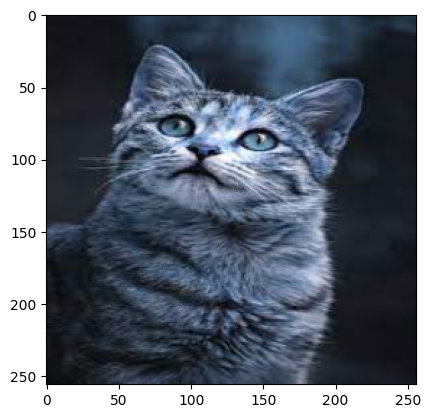

In [38]:
plt.imshow(test_img1)

In [42]:
model1.predict(np.expand_dims(test_img1, axis=0))

1/1 [==============================] - 1s 615ms/step


array([[1.]], dtype=float32)

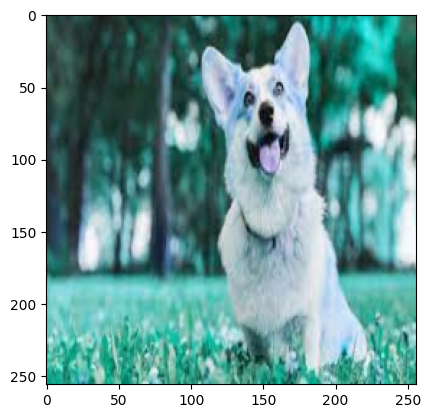

In [43]:
plt.imshow(test_img2)

In [47]:
model1.predict(np.expand_dims(test_img2, axis=0))

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

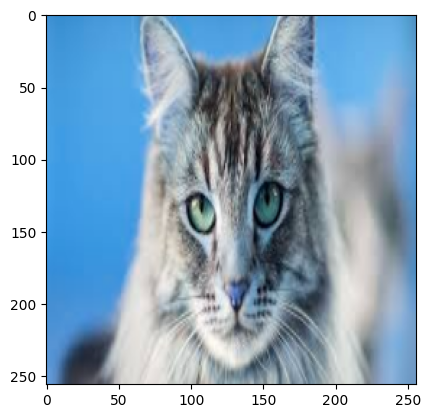

In [48]:
plt.imshow(test_img3)

In [49]:
model1.predict(np.expand_dims(test_img3, axis=0))

1/1 [==============================] - 0s 65ms/step


array([[1.]], dtype=float32)

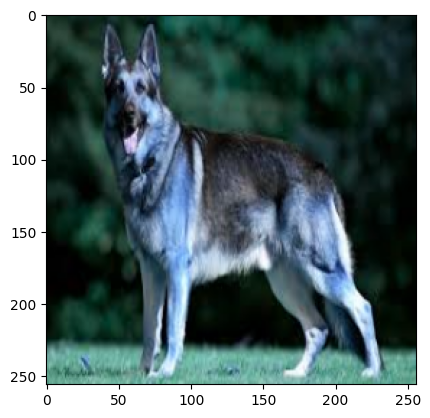

In [50]:
plt.imshow(test_img4)

In [51]:
model1.predict(np.expand_dims(test_img4, axis=0))

1/1 [==============================] - 0s 107ms/step


array([[0.]], dtype=float32)

In [52]:
model1.evaluate(test_data)

157/157 [==============================] - 14s 88ms/step - loss: 0.2965 - accuracy: 0.9346


[0.29647916555404663, 0.9345999956130981]